# Oil Well Placement Optimization: Using Machine Learning to Predict Profitable Placement and Maximize Profit for OilyGiant
Selecting the ideal placement for a profitable oil well is critical for the success of OilyGiant.  The labor and expense of drilling in a sub-par location is damaging for the company's and investors' profits.  Machine learning can leverage data-driven techniques to predict profitable placement.

I will determine the ideal placement for a new well from one of three potential regions by analyzing existing wells in each respective region and training an ML model to estimate oil volume using this historical data and predict profit potential.  Given the need for accurate predictions, I will use the bootstrapping method to assess variability and stability of profit estimates.  By identifying the region that is predicted to have the highest profit margin, OilyGiant can make a data-informed decision for new well placement and maximize profit.

## Data Preparation
I will first import all needed modules, then download and prepare the data.

In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Model Selection and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Machine Learning Model
from sklearn.linear_model import LinearRegression

# Metrics and Evaluation
from sklearn.metrics import (
    accuracy_score, 
    mean_squared_error
)

# Visualization
import matplotlib.pyplot as plt

In [2]:
region_1 = pd.read_csv('/datasets/geo_data_0.csv')
region_2 = pd.read_csv('/datasets/geo_data_1.csv')
region_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
region_1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
region_2

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
region_3

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [6]:
region_1['product'].describe()

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

In [7]:
region_2['product'].describe()

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

In [8]:
region_2['product'].value_counts().sort_index()

0.000000      8235
3.179103      8337
26.953261     8468
30.132364     8306
53.906522     8472
57.085625     8390
80.859783     8320
84.038886     8431
107.813044    8201
110.992147    8303
134.766305    8304
137.945408    8233
Name: product, dtype: int64

In [9]:
region_3['product'].describe()

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

In [10]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


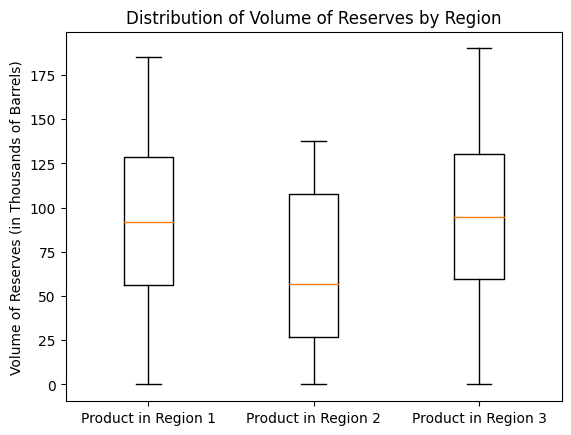

In [13]:
region_1_product = region_1['product']
region_2_product = region_2['product']
region_3_product = region_3['product']

plt.boxplot([region_1_product, region_2_product, region_3_product], labels=['Product in Region 1', 'Product in Region 2', 'Product in Region 3'])
plt.ylabel('Volume of Reserves (in Thousands of Barrels)')
plt.title('Distribution of Volume of Reserves by Region')
plt.show()

The datasets contain data for 100k wells in each geographic region.  Specifically, each well is identified by a unique id, followed by 3 data points that provide specifics on each well's features, and the volume of reserves (in thousands of barrels) in each well.  All data is intact.  Data is primarily numerical with the exception of the unique well id.  Given this id is not needed for building a predictive model, I will drop this column in each dataset.

On average, wells in region 3 contain the most oil (95k barrels), followed by region 1 (92.5k).  Wells in region 2 contain only around 2/3 as much on average (just under 69k).  Region 3 is also home to the oil well with the greatest volume of oil: just over 190k barrels.  The boxplot above, however, shows how close Region 1 and Region 3 are in terms of reserves.  Region 2, by volume alone, is unlikely to be a good choice for new wells given the comparatively low volume of its reserves.

In [14]:
region_1.duplicated().sum()

0

In [15]:
region_2.duplicated().sum()

0

In [16]:
region_3.duplicated().sum()

0

There are no fully duplicate rows.  I will also check the id column for duplicates.

In [17]:
region_1.duplicated('id').sum()

10

In [18]:
region_1[region_1.duplicated(subset='id', keep=False)]

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


Given that the ids seem to be assigned to different rows with very different values, this seems to just be a strange coincidence.  It would definitely be worth contacting the data owner to find out why this happened and get additional details about these wells.  However, for now, I will leave them in the dataset as they are clearly associated with different locations.  The team can reach out to the data owner before well production begins, especially if any of these IDs are associated with the 200 final well locations the team decides upon.

In [19]:
region_2.duplicated('id').sum()

4

In [20]:
region_2[region_2.duplicated(subset='id', keep=False)]

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [21]:
region_3.duplicated('id').sum()

4

In [22]:
region_3[region_3.duplicated(subset='id', keep=False)]

,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


The same duplicate id problem occurs in the other two datasets, but for now, it seems best to leave them intact, as explained above.

The data is now ready for beginning to build predictive models.  In the next section, I will build, train, and test a model for each region.

## Training and Testing Regional Models
For each region, I will train and test a model to help determine the ideal placement for new, profitable wells.
### Splitting Data
I will first identify the features and target value for each region.  Then, I will split the data into a training and validation set at a ratio of 75:25.

In [23]:
#features & target value
#region 1
features_1 = region_1.drop(['id', 'product'], axis=1)
target_1 = region_1['product']

#region 2
features_2 = region_2.drop(['id', 'product'], axis=1)
target_2 = region_2['product']

#region 3
features_3 = region_3.drop(['id', 'product'], axis=1)
target_3 = region_3['product']

In [ ]:
#training & validation sets
#region 1
train_features_1, valid_features_1, train_target_1, valid_target_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=21)

#region 2
train_features_2, valid_features_2, train_target_2, valid_target_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=21)

#region 3
train_features_3, valid_features_3, train_target_3, valid_target_3 = train_test_split(features_3, target_3, test_size=0.25, random_state=21)

### Training the Model & Making Predictions
In this section, I will build a linear regression model for each region as it is the most predictable model in this instance.  Because linear regression is sensitive to the scale of input features, I will normalize the features before training the models.

In [25]:
scaler = StandardScaler()

train_features_1 = scaler.fit_transform(train_features_1)
valid_features_1 = scaler.transform(valid_features_1)
train_features_2 = scaler.fit_transform(train_features_2)
valid_features_2 = scaler.transform(valid_features_2)
train_features_3 = scaler.fit_transform(train_features_3)
valid_features_3 = scaler.transform(valid_features_3)

In [26]:
model = LinearRegression()

#model for region 1
model_1 = model.fit(train_features_1, train_target_1)
predict_1 = model_1.predict(valid_features_1)

#model for region 2
model_2 = model.fit(train_features_2, train_target_2)
predict_2 = model_2.predict(valid_features_2)

#model for region 3
model_3 = model.fit(train_features_3, train_target_3)
predict_3 = model_3.predict(valid_features_3)

### Correct Answers
Predictions are saved in their corresponding variable above: predict_x.  Correct answers for each region are renamed below for simplicity in code going forward:

In [27]:
correct_1 = valid_target_1.copy()
correct_2 = valid_target_2.copy()
correct_3 = valid_target_3.copy()

In [28]:
# Reviewer's code 1.1

l = {'A':[1,2,4], 'B':[3,3,5]}

df1 = pd.DataFrame(l)

df2 = df1

df3 = df1.copy() 

display(df1, df2, df3)

,A,B
0,1,3
1,2,3
2,4,5


,A,B
0,1,3
1,2,3
2,4,5


,A,B
0,1,3
1,2,3
2,4,5


In [29]:
# Reviewer's code 1.2

df2.loc[0, 'A'] = 'change2'

df3.loc[1, 'A'] = 'change3'

display(df1, df2, df3)

,A,B
0,change2,3
1,2,3
2,4,5


,A,B
0,change2,3
1,2,3
2,4,5


,A,B
0,1,3
1,change3,3
2,4,5


### Average Volume of Predicted Reserves & Model RMSE
First, I will calculate the average volume of predicted reserves for each region.  Then, I will calculate the model's root mean squared error to gain insight into how accurate these predictions are.

In [30]:
avg_rsv_1 = predict_1.mean()
avg_rsv_2 = predict_2.mean()
avg_rsv_3 = predict_3.mean()

print('The average volume of predicted reserves in Region 1 is', avg_rsv_1)
print('The average volume of predicted reserves in Region 2 is', avg_rsv_2)
print('The average volume of predicted reserves in Region 3 is', avg_rsv_3)

The average volume of predicted reserves in Region 1 is 92.59328351703151
The average volume of predicted reserves in Region 2 is 68.62481567708402
The average volume of predicted reserves in Region 3 is 95.12464975101973


The average volume of predicted reserves is very similar to the average volume for each data set calculated above.  I will verify the accuracy of these predictions by calculating the RMSE.

In [31]:
rmse_1 = mean_squared_error(correct_1, predict_1) ** 0.5
rmse_2 = mean_squared_error(correct_2, predict_2) ** 0.5
rmse_3 = mean_squared_error(correct_3, predict_3) ** 0.5

print('The RMSE of the model for Region 1 is', rmse_1)
print('The RMSE of the model for Region 2 is', rmse_2)
print('The RMSE of the model for Region 3 is', rmse_3)

The RMSE of the model for Region 1 is 37.88444219106963
The RMSE of the model for Region 2 is 0.887448352297974
The RMSE of the model for Region 3 is 40.09564551166241


The model for Region 2 is very accurate.  The models for regions 1 and 3 are less accurate, though this may be due to the fact that the range for those datasets is larger.

### Analysis
Based on initial runs of the models, wells in Region 3 have the highest average volume of predicted reserves (95k), followed closely by Region 1 (93k).  However, while Region 2 has lower average predicted reserves (69k), the model is significantly more accurate compared to the models for Regions 1 and 3.

## Calculating Potential Profit
I will now calculate potential profit for each region.
### Key Values
To make calculations easier, I will first establish key value variables for calculating the return on investment.  Before OilyGiant invests in drilling a new well, the company needs to ensure that the well will provide a positive return on investment.  Due to lack of information on operating costs, taxes, etc, these calculations will use a modified ROI calculation that uses only known revenue and investment figures.

In [32]:
#Constants
INVESTMENT = 100_000_000
WELLS = 200
REVENUE = 4500 #usd per thousand barrels
COST_PER_WELL = INVESTMENT / WELLS

### Calculating Reserves Needed to Justify Development 
Using these key values, I will now calculate what volume of reserves are needed to justify potential development.  Then, I will compare this against the predictions created by the models above.

In [33]:
POS_ROI = COST_PER_WELL / REVENUE
print(f'The minimum volume for regional wells to make a profit is: {POS_ROI:.2f} thousand barrels.')

The minimum volume for regional wells to make a profit is: 111.11 thousand barrels.


### Findings
Looking at just averages, none of the regions are prime for profitable development: all have an average well output of under 111k barrels.  However, this number is just an average.  Some wells produce more than others and a region may still be profitable even if its wells' average volume is less than 111k.  Given the company does not plan to drill more than 200 wells in a given area, this finding is not proscriptive.  In further steps, calculations will only focus on wells with high predicted reserves.

## Calculating Potential Profit
### Selecting Most Profitable Wells
Given that the company only plans to drill 200 wells in a region, I will write a function calculating potential profits for only those 200 wells.

In [34]:
def profit_calc(predictions, targets):
    predictions = pd.Series(predictions).sort_values(ascending=False)
    targets = pd.Series(targets).reset_index(drop=True)

    top_targets = targets[predictions.index][:WELLS]
    
    total_reserves = top_targets.sum()
    total_revenue = total_reserves * REVENUE
    profit = total_revenue - WELLS * COST_PER_WELL
    
    return profit

reg_1_profit = profit_calc(predict_1, valid_target_1)
reg_2_profit = profit_calc(predict_2, valid_target_2)
reg_3_profit = profit_calc(predict_3, valid_target_3)
print(f'Profit for Region 1: {reg_1_profit}.')
print(f'Profit for Region 2: {reg_2_profit}.')
print(f'Profit for Region 3: {reg_3_profit}.')

Profit for Region 1: 30488361.316397265.
Profit for Region 2: 24150866.966815114.
Profit for Region 3: 26557464.5850565.


In [35]:
# Reviewer's code 2

pred1 = pd.Series(predict_1).sort_values(ascending=False)
target = valid_target_1.reset_index(drop=True)

points = target[pred1.index][:200]
product = points.sum()
product * 4500 - 1e8

30488361.316397265

Based on these predictions, Region 1 is the best region for OilyGiant to pursue drilling new wells.  It is poised to generate over 30 million in profits for the company.  The other regions are, in terms of pure profit predictions, less appealing: Region 3 would produce 26 million in profits, followed by Region 2 with 24 million.  Use of bootstrap sampling, calculating the 95% confidence interval, and further inquiry into risk will help determine if Region 1 is in fact the better region.

### Target Volume of Reserves vs Profit Potential
I previously discovered that the minimum volume for wells to be profitable is by generating approximately 111k barrels.  Region 1 is the most profitable potential region.  Given that each well needs to generate at least 111k barrels to be profitable, I will verify that each of the 200 wells to be drilled in the region is capable of producing at least that much.

In [36]:
top_200_1 = np.sort(predict_1)[-200:]
print(top_200_1.min())
print(top_200_1.max())

147.26169944896566
185.46312771311


In [37]:
top_200_2 = np.sort(predict_2)[-200:]
print(top_200_2.min())
print(top_200_2.max())

138.3994560989703
139.7595734266725


In [38]:
top_200_3 = np.sort(predict_3)[-200:]
print(top_200_3.min())
print(top_200_3.max())

142.50244421226412
171.46223527487265


All 200 wells will produce at least 27k barrels in excess of the minimum required to justify the cost of drilling the well, generating  at least 121k in profits.  The well with the greatest volume of reserves will produce around 74k extra barrels or 333k in profits.

As for the other regions, Region 2's wells will all produce less than Region 1 and Region 3's smallest wells.  Region 3 trends below Region 1, but may still be a good region to consider depending on the distribution of profit and risk of losses.
### Findings
Based on this inquiry, Oily Giant should drill in Region 1, as it has the greatest profit potential and all wells will produce well in excess of the 111k barrels needed for a well to be profitable.
## Regional Risks & Profit
The previous calculations have not taken into account risks.  This section will employ the bootstrapping technique to find the distribution of profit for each region, the average profit, 95% confidence interval, and the risk of losses to confirm or challenge earlier conclusions.
### Average Profit, 95% Confidence Interval, and Risk of Losses

In [40]:
regions = ['region_1', 'region_2', 'region_3']
predictions = [predict_1, predict_2, predict_3]
targets = [valid_target_1, valid_target_2, valid_target_3]

def subsampler(predictions, targets, regions):
    region_profits = {}
    for region, prediction, target in zip(regions, predictions, targets):
        predandtargets = pd.DataFrame({'prediction': prediction, 'target': target}).reset_index(drop=True)
        profits = []
        for i in range(1000):
            subsample = predandtargets.sample(n=500, replace=True, random_state=i)
        
            sorted_subsample = subsample.sort_values(by='prediction', ascending=False).reset_index(drop=True)
            sorted_predictions = sorted_subsample['prediction']
            aligned_targets = sorted_subsample['target']
            
            profit = profit_calc(sorted_predictions, aligned_targets)
            profits.append(profit)
        
        region_profits[region] = profits
        
    return region_profits

bs_profits = subsampler(predictions, targets, regions)

for region in bs_profits:
    region_profits = np.array(bs_profits[region])
    mean_profit = np.mean(region_profits)
    conf_intvl = np.percentile(region_profits, [2.5, 97.5]).round(2)
    risk = (region_profits < 0).mean()
    print(f'Mean profit for {region}: {mean_profit:.2f}')
    print(f'95% Confidence Interval for {region}: {conf_intvl}')
    print(f'Risk of Loss for {region}: {risk*100:.2f}%')
    
    

Mean profit for region_1: 4439240.77
95% Confidence Interval for region_1: [-584744.82 9596717.21]
Risk of Loss for region_1: 4.20%
Mean profit for region_2: 4321070.65
95% Confidence Interval for region_2: [ 359788.44 8395120.53]
Risk of Loss for region_2: 1.80%
Mean profit for region_3: 4112543.65
95% Confidence Interval for region_3: [-731783.05 9087611.12]
Risk of Loss for region_3: 5.80%


### Provide Findings
Based on these metrics, Region 1 is actually the riskiest region to drill in, and the company should avoid it as the risk of loss is 100%!  Region 2, despite its smaller reserves, is in fact the best choice as the risk of loss is only 1.8% and the 95% confidence interval predicts positive profit, with a potential maximum profit of 8 million and a mean profit of 4 million.  OilyGiant would do well to invest in wells in region 2 given it has the highest average profit, a 95% confidence interval that is positive, and a minimal risk of losses.

## Conclusion
This project used machine learning to predict the ideal region for OilyGiant to expand operations to maximize profit.  Using 100k data points from three prospective regions, I trained a linear regression model to predict the volume of oil reserves and calculate potential profit.  Of the regions studied, the model for Region 2 had the highest accuracy and Region 3 had the largest individual well reserves.  However, Region 1 emerged as the most reliable and profitable region due to a greater volume of reserves that well exceeded the minimum required for profitability.  

To ensure reliability of these predictions, I used bootstrapping for each region to collect a subsample of 1000 predictions of profit for each region.  Based on this test, Region 1 was by far the riskiest region with a 100% chance of losses.  Region 2 instead emerged as the best region for the company to drill in, showing an average profit of over 4 million and the 95% confidence interval predicts that profit would almost certainly be positive.  Furthermore, the bootstrapped sample revealed only a 1.8% risk of loss for the region.

Given these findings, OilyGiant should focus their resources on developing new wells in Region 2, where profit potential is highest due to highly accurate predictions of the volume of reserves and a risk of loss is virtually nonexistent.  The findings from this project are sure to guide OilyGiant toward optimal resource allocation that maximizes company profits.